## Basit Doğrusal Regresyon

* Anakitle teorik gösterim : Y = b0 + b1*X + E
* Örneklem gerçek değerler : Yi = b0 + b1*Xi + ei
* Tahmin modeli : Yi  = b0 + b1*Xi

b0 = doğrunun y eksenini kestiği nokta

b1 = doğrunun eğimi

E = hata terimi

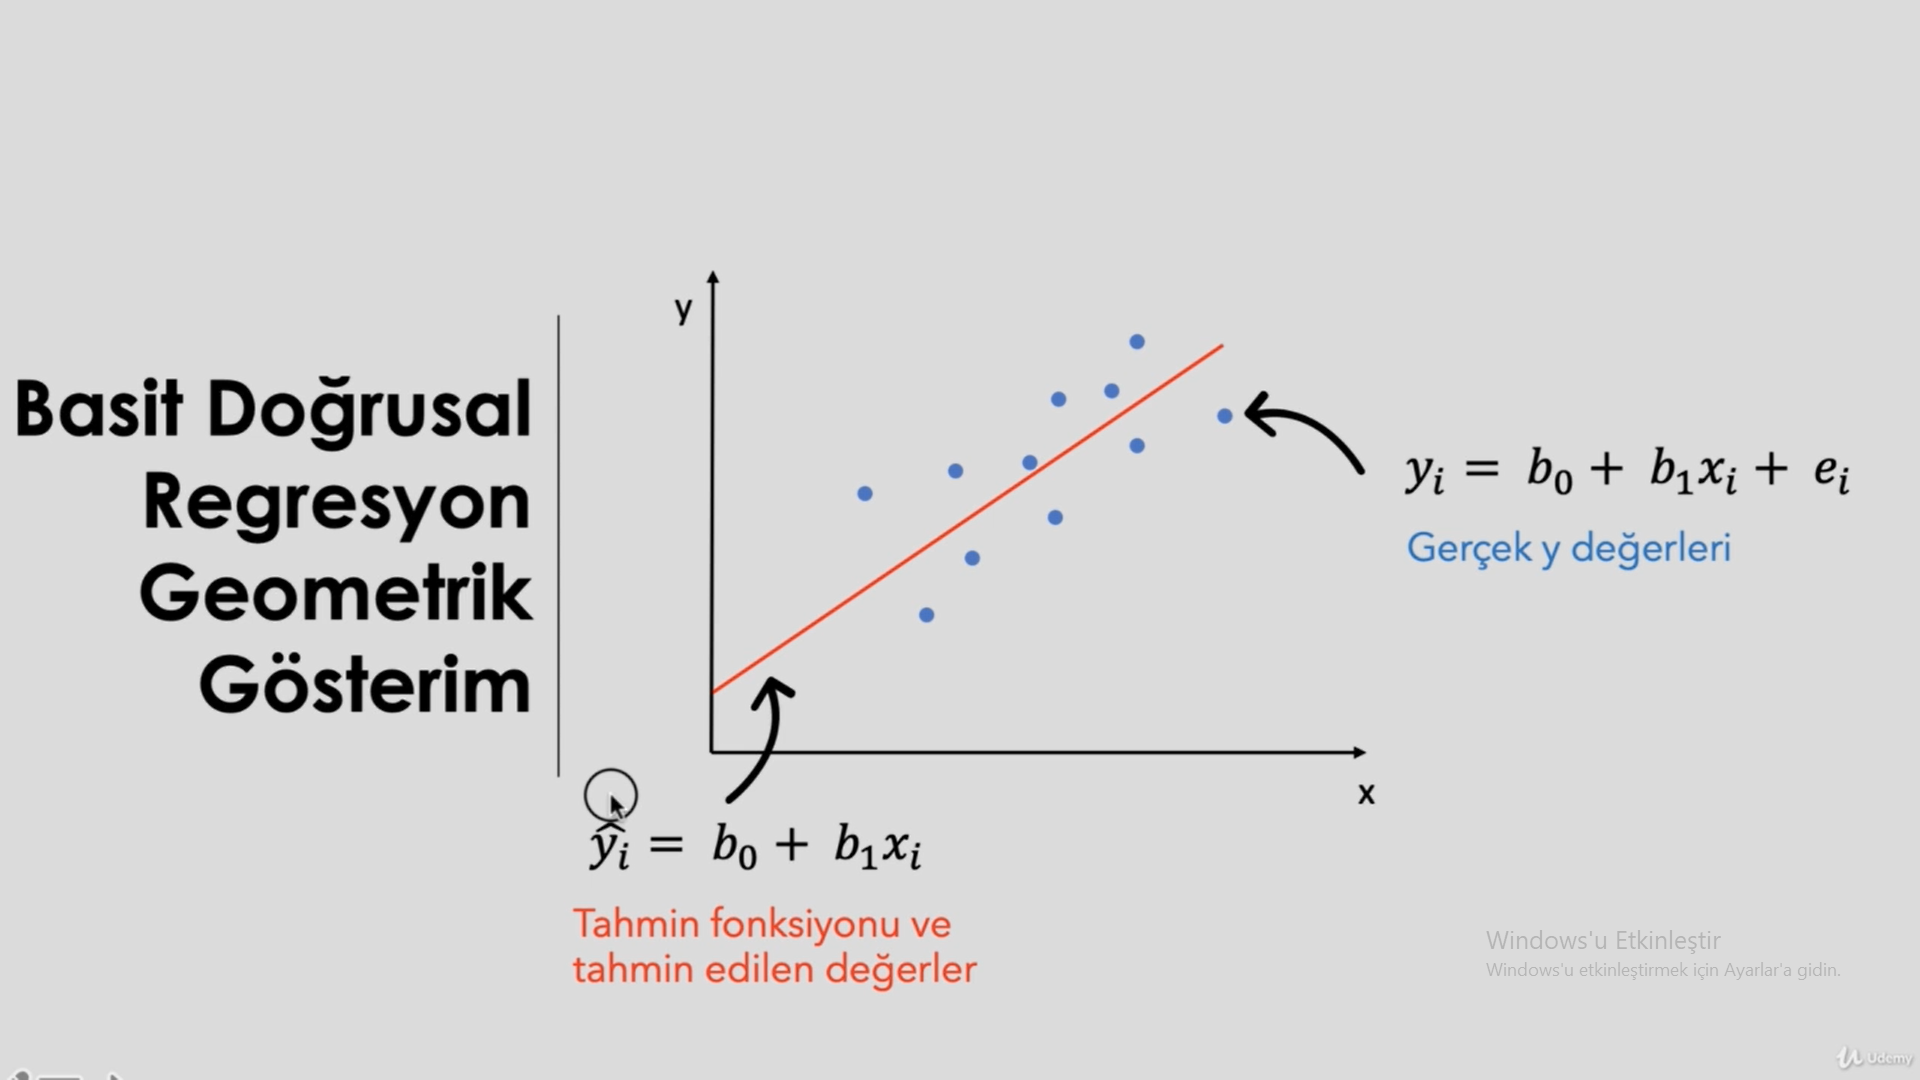

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
## Değişkenlerin dağılımı ve korelasyonu incelemek için
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


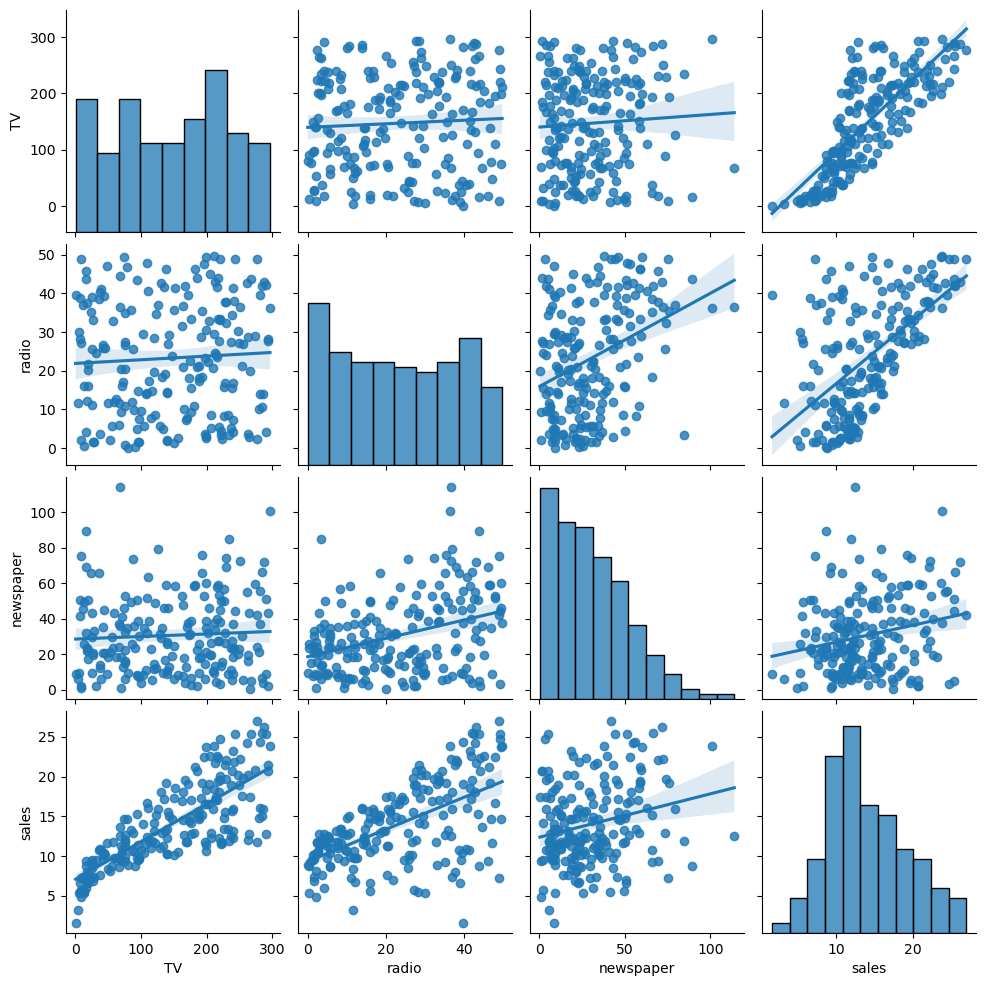

In [7]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

TV reklamları ile sales(satış) arasında korelasyona bakıldığında 0.78 gibi pozitif bir değer çıkmaktadır ve pairplotta bakıldığında x ekseni TV, y ekseni sales olan grafiğe bakıldığında orantı incelenmiştir. sales ile TV arasındaki ilişkiyi inceleyeceğiz.

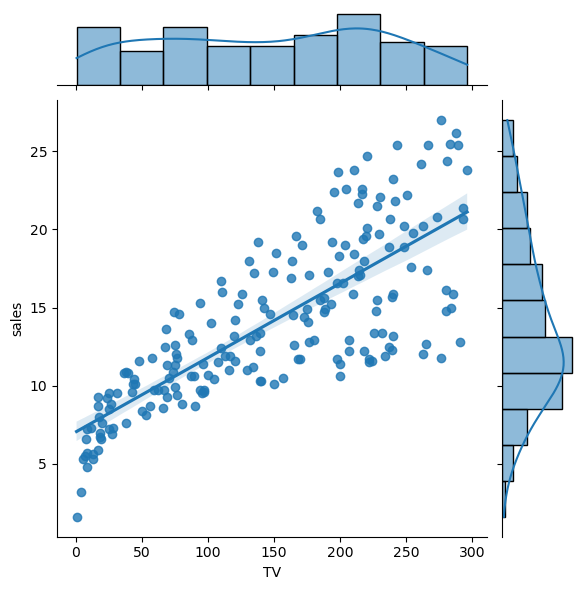

In [8]:
sns.jointplot(x = "TV", y = "sales",data = df, kind = "reg");

In [9]:
import statsmodels.api as sm

In [10]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
X = sm.add_constant(X)

In [12]:
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [14]:
## lm = linear model
lm = sm.OLS(y,X)

In [15]:
## Gerçek model fit edilir

model = lm.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        16:28:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit-learn ve statsmodels
Scikit-learn ile model eğitmek çok daha iyi olsa da scikit-learn ile istatiksel verilere bakmak o kadar iyi olmamaktadır. İstatiksel verilere bakmak istiyorsak statsmodels kütüphanesi kullanmak daha faydalıdır.

R-squared: Bağımsız deiğşkenin bağımlı değişkendeki değişkenliğini açıklama başarısıdır.

Adj. R-squared : Düzeltilmiş R-squared değeridir. R-squared ile R-squared değeri arasındaki fark şudur. R-squared değeri modelin veri sayısı arttıkça şişmeye artmaya devam etmektedir. Modelde ilgili ilgisiz ilişkili ilişkisiz veri olması durumunda R-squared artacaktır. adj. R-squared duyarlılığı daha az olan bağımsız değişken sayıısı artsa da inceleme için daha iyidir.

F-statistic : Modelin anlamlılığının anlaşılması için kurulan test istatistiğidir. Modeli eğittiğimizde bir çıktı verecek fakat bu çıktı anlamlı bir çıktı mı bunu istatiksel olarak ölçeriz.

## Model için anlamlı yerler

TV ve const dataframe'i model için en önemli yerdir. B0 değeri consttaki değerdir yani 7.0326'tür. katsayı coef olarak tanımlanmış. Bu katsayıların anlamlı olup olmadığını anlamak için T istatistiği ve T itatistiğini pi value verilmiş. Sabit katsayı ve TV için bu örnekte katsayılar anlamlıdır. Sonunda katsayıların güven aralığı verilmiştir. TV için yorumlama yapmak gerekirse TV'nin güven aralığına bakıldığında 0.05 değeri görülmektedir. Bu demektir ki TV için güven aralığı %95 oranında doğrudur.

const TV dataframe bakıldığında const değeri 7.03'tür. Yani bağımlı değişkene değer gelmediğinde ortalama satışın 7.03 olması beklenmektedir. TV için coef değeri 0.04'tür. Bağımlı değişkene etkileyecek parametre girildiğinde (bu örnekte incelenen değer TV'dir) her 1 birimlik TV reklamı verildiğinde 0.04'lük satışta artış gözlemlenmektedir. Bu da %4 yapmaktadır. Örneğin 1 milyon dolarlık bir tv reklamı verildiğinde satışa katkısı 40.000$'dır.

In [17]:
import statsmodels.formula.api as smf

lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        16:28:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
## Sadece modelin katsayılarını görmek istersek
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [20]:
## Sadece modelin güven aralığına erişmek için
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [21]:
## Modelin anlamlılığına ilişkin istatiksel veriler için
model.f_pvalue

1.4673897001947095e-42

## Regresyon

Regresyonda olay şudur. Değişkenler parametreler ile çarpılarak tahmin değerleri elde edilecektir

In [22]:
## MOdelin anlamlığını incelemek istediğimizde
model.mse_model

3314.6181668686486

In [23]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [24]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


model.fittedvalues ile ilk 5 terim için modelin tahmin ettiği sayılar görülmektedir. y[0:5] ile modelin gerçek değerlerini görmekteyiz

In [25]:
## Modelin formulünün yazılması
print("Sales = "+str("%.2f"%model.params[0]) + "TV"+"*"+str("%.2f"%model.params[1]))

Sales = 7.03TV*0.05


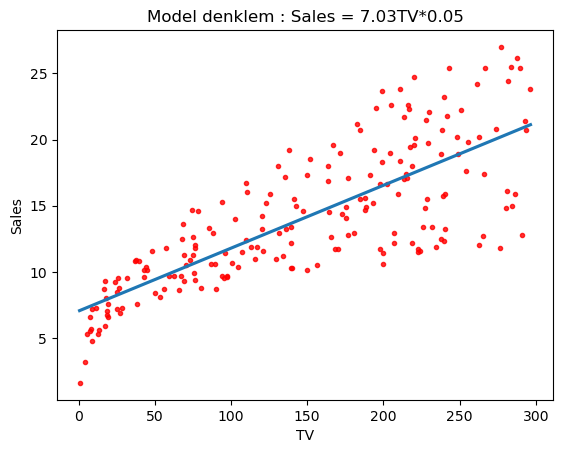

In [26]:
g = sns.regplot(x = "TV", y = "sales",data= df, ci = None, scatter_kws={'color':'r','s':9});
g.set_title("Model denklem : Sales = 7.03TV*0.05")
g.set_ylabel("Sales")
g.set_xlabel("TV") ;

## Scikit-learn ile basit Regresyon modeli oluşturma

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [31]:
model.score(X,y) ## R-squared değeri

0.611875050850071

In [32]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [33]:
print(y[0:10])

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64


# Kurulan model ile Tahmin hesaplama

Model denklemi : Sales(y) = 7.03 + TV*0.04

30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [41]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.coef_

array([0.04753664])

In [42]:
7.03+30*0.04

8.23

In [40]:
## yapacağı işlem şu kendisine girilen değeri kurmuş olduğu modele girecek(sales = 7.03 + TV*0.04)
##ve bu duruma göre değerlerin çıktılarını üretecek
model.predict([[30]])

array([8.45869276])

## Artıklar

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lm = smf.ols("sales~TV",df)
model = lm.fit()

In [50]:
mse = mean_squared_error(y,model.fittedvalues)

In [51]:
mse

10.512652915656757

In [53]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [54]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [55]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [56]:
## k_t : karşilaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10], 
                    "tahmin_y": reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [60]:
k_t["hata_payi"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata_payi
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
## dataframedeki hata_payi bakıldığında + ve - değerler bulunmaktadır. ortalama hesaplarken birbirlerini götürme ihtimalinden
## kaynaklı mutlak değeri ya da karesi alınarak işlem yapılır
k_t["hata_kare"] = np.square(k_t["hata_payi"])
k_t

,gercek_y,tahmin_y,hata_payi,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [65]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [66]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.0480075999967755

Neural Network ve ağaç yapılarında hatalar için tekrar model oluşturulur ve çıkan sonuca göre tekrar model oluşturarak kümilatif şekilde devam eder. Bu sayede hatalar üzerinden optimizasyon sağlanır.

Amacımız hataları optimize etmeye çalışmak olacaktır.

In [67]:
## Modelin fazlalıklarını ifade eden değerlere bakmak
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

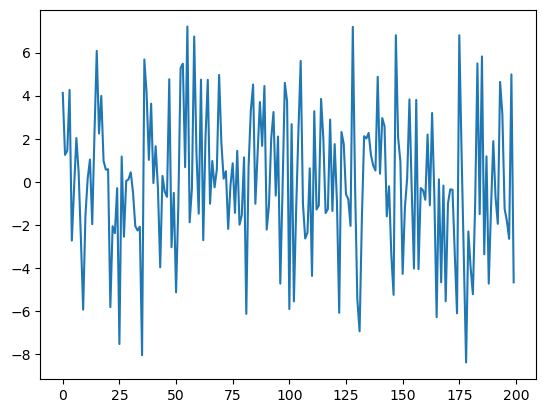

In [69]:
import matplotlib.pyplot as plt
plt.plot(model.resid);

-8 ile 8 değerlerine giderek aykırı değerlere bakarak optimizasyonu sağlamak gerekmektedir.